# Лаботаторная Работа №2 по курсу СМВМ
## Методы решения бигармонических уравнений
### Выполнил: Александров Евгений Александрович, группа 20152
#### Метод отражения Хаусхолдера


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sympy
from sympy import diff

import sys

In [4]:
#Отладка sympy и показ  основных функций
x = sympy.Symbol('x')
dx  = 4*sympy.chebyshevt(4, x)
sympy.pprint(dx)
dx = diff(sympy.chebyshevt(4, x))
sympy.pprint(dx)
dx = dx.subs(x,1)
sympy.pprint(dx)

    4       2    
32⋅x  - 32⋅x  + 4
    3       
32⋅x  - 16⋅x
16


Решение глобальной слау прямым методом

In [7]:
#Пусть даны следующие переменные:
L = 1 #Граница решения оригинального ДУ
N = 5 #Степень требуемого полинома
K = 5 #Количество ячеек для разбиения
h = L/(2*K) #Ширина ячейки

global coll_dot #Массив коллокационных точек

#Инициализация коллокационных точек
def coll_init(N):
    coll_dot = np.zeros([N+1]) 
    for m in range (N+1):
        coll_dot[m] = np.cos((2*(m+1)-1)*np.pi/(2*(N+1)))
    coll_dot = np.flipud(coll_dot)
    #print(coll_dot)
    return coll_dot

In [8]:
#Определение функции полинома Чебышева
def Chebishev(x_point, n):
    x = sympy.Symbol('x')
    f  = sympy.chebyshevt(n, x)
    return f.subs(x,x_point)

#Определение производных полинома Чебышева
def Chebishev_dx(x_point, n):
    x = sympy.Symbol('x')
    f  = sympy.chebyshevt(n, x)
    f = diff(f,x)
    return f.subs(x,x_point)

def Chebishev_d2x(x_point, n):
    x = sympy.Symbol('x')
    f  = sympy.chebyshevt(n, x)
    f = diff(f,x,2)
    return f.subs(x,x_point)   

def Chebishev_d3x(x_point, n):
    x = sympy.Symbol('x')
    f  = sympy.chebyshevt(n, x)
    f = diff(f,x,3)
    return f.subs(x,x_point) 

def Chebishev_d4x(x_point, n):
    x = sympy.Symbol('x')
    f  = sympy.chebyshevt(n, x)
    f = diff(f,x,4)
    return f.subs(x,x_point) 

In [9]:
x = sympy.Symbol('x')
f  = sympy.chebyshevt(n, x)
print(f)
f = diff(f,x)
print(f)



NameError: name 'n' is not defined

In [10]:
#Функция-заполнитель коллакационных блоков матрицы СЛАУ
def Coll_block(A, jj):
    for i in range (N+1):
        for j in range (N+1):
            A[jj*(N+5)+j][jj*(N+1)+i] = Chebishev_d4x(coll_dot[j],i)

In [11]:
#Функция-заполнитель левого блока согласования
def Coop_block_left(A):
    for j in range (N+1):
        A[N+1][j] = (Chebishev(1,j) + Chebishev_dx(1,j))
        A[N+1][j+N+1] = -(Chebishev(-1,j) + Chebishev_dx(-1,j))

        A[N+2][j] = Chebishev_d2x(1,j) + Chebishev_d3x(1,j)
        A[N+2][j+N+1] = -(Chebishev_d2x(-1,j) + Chebishev_d3x(-1,j))

#Функция-заполнитель правого блока согласования
def Coop_block_right(A):
    for j in range (N+1):
        A[(K-1)*(N+5)+N+1][j+(K-2)*(N+1)] = -(Chebishev(1,j) - Chebishev_dx(1,j))
        A[(K-1)*(N+5)+N+1][j+(K-1)*(N+1)] = (Chebishev(-1,j) - Chebishev_dx(-1,j))

        A[(K-1)*(N+5)+N+2][j+(K-2)*(N+1)] = -(Chebishev_d2x(1,j) - Chebishev_d3x(1,j))
        A[(K-1)*(N+5)+N+2][j+(K-1)*(N+1)] = (Chebishev_d2x(-1,j) - Chebishev_d3x(-1,j))

#Функция-заполнитель внутренних блоков согласования
def Coop_block_in(A, i):
    for j in range (N+1):
        A[i*(N+5)+N+1][j+(i-1)*(N+1)] = -(Chebishev(1,j) - Chebishev_dx(1,j))
        A[i*(N+5)+N+1][j+(i)*(N+1)] = (Chebishev(-1,j) - Chebishev_dx(-1,j))
        
        A[i*(N+5)+N+2][j+(i-1)*(N+1)] = -(Chebishev_d2x(1,j) - Chebishev_d3x(1,j))
        A[i*(N+5)+N+2][j+(i)*(N+1)] = (Chebishev_d2x(-1,j) - Chebishev_d3x(-1,j))
        
        
        A[i*(N+5)+N+3][j+(i)*(N+1)] = (Chebishev(1,j) + Chebishev_dx(1,j))
        A[i*(N+5)+N+3][j+(i+1)*(N+1)] = -(Chebishev(-1,j) + Chebishev_dx(-1,j))
        
        A[i*(N+5)+N+4][j+(i)*(N+1)] = (Chebishev_d2x(1,j) + Chebishev_d3x(1,j))
        A[i*(N+5)+N+4][j+(i+1)*(N+1)] = -(Chebishev_d2x(-1,j) + Chebishev_d3x(-1,j))
        

In [12]:
#Функция-заполнитель блоков граничных условий
def Edge_block_left(A):
    for j in range (N+1):
            A[N+3][j] = Chebishev(-1,j)
            A[N+4][j] = Chebishev_dx(-1,j)
            
def Edge_block_right(A):
    for j in range (N+1):
            A[(K-1)*(N+5)+N+3][j+(K-1)*(N+1)] = Chebishev(1,j)
            A[(K-1)*(N+5)+N+4][j+(K-1)*(N+1)] = Chebishev_dx(1,j)

In [13]:
#Конструктор матрицы СЛАУ
def A_construct(N,K):
    A = np.zeros([K*(N+5),K*(N+1)])
    
    Edge_block_left(A)
    Edge_block_right(A)
    Coop_block_left(A)
    Coop_block_right(A)
    
    for i in range (K):
        Coll_block(A, i)
        if (i < K-1) and (i > 0):
            Coop_block_in(A, i)
    return A           

In [14]:
#Функция четвертого дифференциала точного решения
def Func(x_point):
    x = sympy.Symbol('x')
    f= x**2*(1-x)**2*sympy.exp(x)
    f = diff(f,x,4)
    #sympy.pprint(dx)
    return f.subs(x,x_point) 

#Функция точного решения
def Acc_Func(x_point):
    x = sympy.Symbol('x')
    f  = x**2*(1-x)**2*sympy.exp(x)
    return f.subs(x,x_point) 

In [15]:
#Конструктор вектора правой части
def v_construct(N,K):
    bb = np.zeros([K*(N+5)])
    for i in range(K):
        for g in range(N+1):
            bb[i*(N+5)+g] =  h**4*Func(h*coll_dot[g] + h*(2*i+1))
    return bb

In [16]:
#Обратный ход Гаусса, нижнетреугольный
def Back_Gauss(A_m, n_c, y):
    Parr = np.zeros(n_c)
    for i in range(n_c):
        for j in range(n_c):
            y[n_c - i-1] = y[n_c - i-1] - Parr[j]*A_m[n_c - i-1][n_c - j-1]
        Parr[i] = y[n_c - i-1] / A_m[n_c - i-1][n_c - i-1]
    Parr = np.flipud(Parr)    
    return Parr  

#Метод Хаусхолдера
def Householder_RAM_Opti(A_m, b, n_c, m_c):
    
    SVD = np.linalg.svd(A_m, compute_uv = False)
    Obs = max(SVD)/min(SVD)
    for i in range(n_c):
        v = np.copy(A_m[i:m_c, i])
        v[0] += np.linalg.norm(v)
        v.shape = (m_c-i, 1)
        b.shape = (m_c, 1)
        A_m[i:m_c, i:m_c] -= 2*np.dot(v, np.dot(v.T, np.copy(A_m[i:m_c, 
                                            i:m_c])))/np.dot(v.T, v)
        b[i:m_c] -= 2*np.dot(v, np.dot(v.T, np.copy(b[i:m_c])))/np.dot(v.T, v)
    QD = np.copy(A_m[0:n_c,0:n_c])
    B = np.copy(b[0:n_c])
    B.shape = (n_c, 1)
    Par = np.zeros(n_c)
    Par = Back_Gauss(np.copy(QD), n_c, np.copy(B))     
    return (Par, Obs)

#Реинициализация сеточных переменных, нужна для создания новых решений с другими значениями K, N, h
#Реинициализация вектора коллокационных точек, вектора правой части, матрицы СЛАУ 

N = 6
K = 6
h = L/(2*K)
coll_dot = coll_init(N)
AA = A_construct(N,K)
bb = v_construct(N,K)



np.savetxt('A.txt', AA, fmt = '%d')

#xxx = np.linalg.lstsq(np.copy(AA), np.copy(bb), rcond=None)[0]
#print(xxx)
#print('---------------------------------------------------------')
param = Householder_RAM_Opti(np.copy(AA), np.copy(bb), K*(N+1) ,K*(N+5))[0]


In [17]:
def solver(xxx, N, K):
    x_glob = np.zeros((N+1)*(K))
    y_glob_solv = np.zeros((N+1)*(K))
    x_loc= np.zeros(N+1)
    
    for i in range (N+1):
        x_loc[i] = -1 + 2/(N+1)*i
        
    y_glob_acc = np.zeros((N+1)*(K))
    
    for i in range ((N+1)*K):
        x_glob[i] = i/((N+1)*(K))
        y_glob_acc[i] = Acc_Func(x_glob[i])
        
        
    for i in range(K):
        for j in range(N+1):
            pol = [Chebishev(x_loc[j], g) for g in range (N+1)]
            par = xxx[i*(N+1):(i+1)*(N+1)]
            y_glob_solv[i*(N+1)+j] = np.dot(par.T,pol)
            
    #plt.plot(x_glob, y_glob_solv, 'b', x_glob, y_glob_acc, 'g--')
    
solver(param, N, K)

In [21]:
def solvation(Par, N, K):
    M=100
    
    y_glob_solv = np.zeros(M*K)
    y_glob_acc = np.zeros(M*K)
    
    x_loc= np.zeros(M)
    x_glob = np.zeros(M*K)
    
    for i in range (M):
        x_loc[i] = -1 + 2/M*i
    
    for i in range (M*K):
        x_glob[i] = i/(M*K)
        y_glob_acc[i] = Acc_Func(x_glob[i])
         
    for i in range(K):
        for j in range(M):
            pol = [Chebishev(x_loc[j], g) for g in range (N+1)]
            par = Par[i*(N+1):(i+1)*(N+1)]
            y_glob_solv[i*(M)+j] = np.dot(par.T,pol)
    #print(len(y_glob_solv), len(y_glob_acc))
    #plt.plot(x_glob, y_glob_solv, 'b', x_glob, y_glob_acc, 'g--')        
    return(x_glob, y_glob_solv, y_glob_acc)        

In [22]:
def E_r(v, w):
    d= [0]*len(w)
    for i in range (len(w)):
        d[i] = np.abs(w[i] - v[i])
    return max(d)/max(w)

def E_a(w, v):
    d= [0]*len(w)
    for i in range (len(w)):
        d[i] = np.abs(w[i] - v[i])
    return max(d)

Размер сетки, К | ||Ea|| | Порядок сходимости | ||Er|| | Порядок сходимости | |μ(A)
--------------------------------------------------------------------------------
5 | 6.942731e-03 | 0.000000e+00 | 6.531847e-02 | 0.000000e+00 | 8335.974305 |
--------------------------------------------------------------------------------
10 | 1.695764e-03 | 2.033568e+00 | 1.595405e-02 | 2.033568e+00 | 127084.198346 |
--------------------------------------------------------------------------------
20 | 4.209617e-04 | 2.010174e+00 | 3.960477e-03 | 2.010177e+00 | 2024819.391013 |
--------------------------------------------------------------------------------
40 | 1.050597e-04 | 2.002480e+00 | 9.884190e-04 | 2.002480e+00 | 32370865.117792 |
--------------------------------------------------------------------------------
80 | 2.625338e-05 | 2.000634e+00 | 2.469961e-04 | 2.000634e+00 | 517832690.977442 |
--------------------------------------------------------------------------------


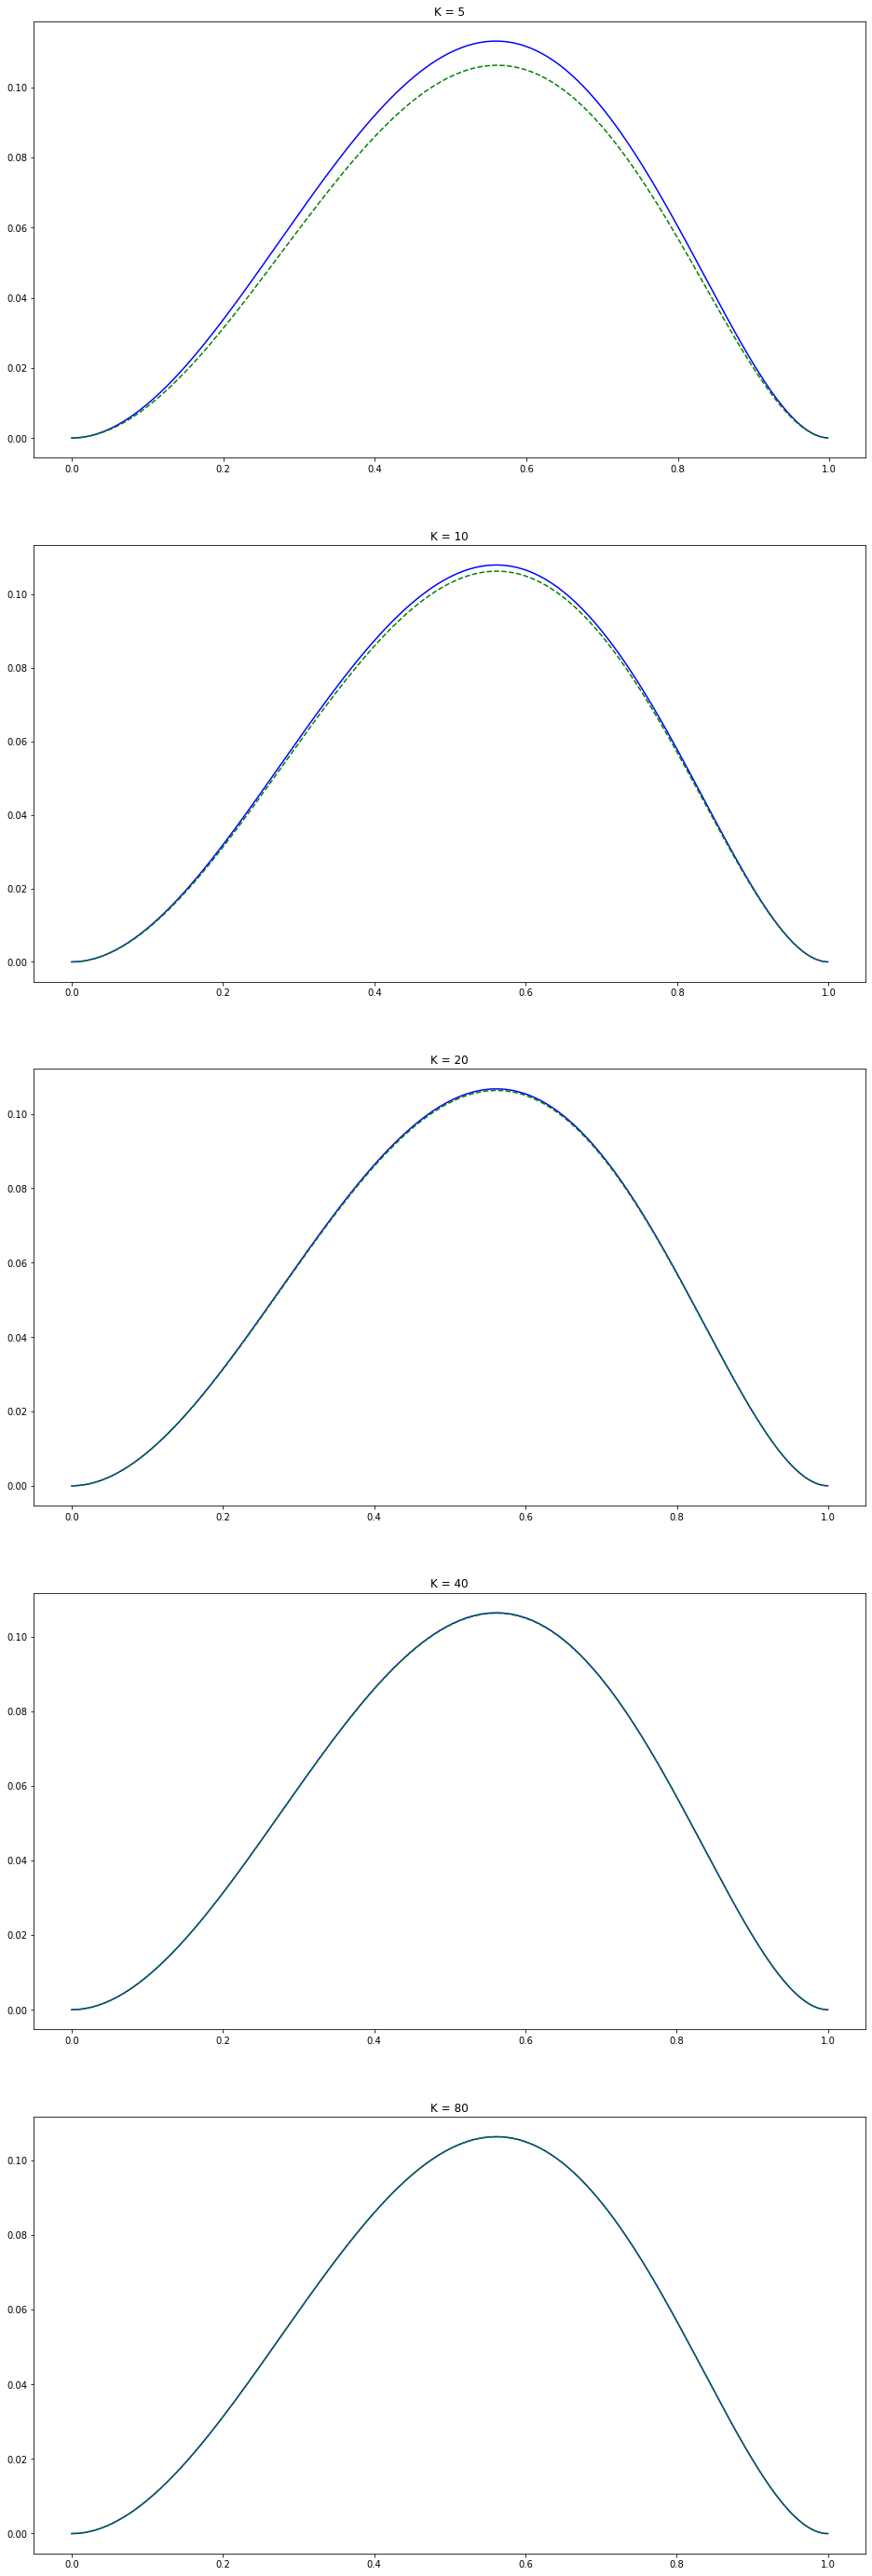

In [23]:
K_list = [5,10,20,40,80]
#K_list = [5]

print("Размер сетки, К | ||Ea|| | Порядок сходимости | ||Er|| | Порядок сходимости | |μ(A)")
print("--------------------------------------------------------------------------------")
plt.figure(figsize=(16,50))
for i in range (len(K_list)):
    N = 4
    K = K_list[i]
    h = L/(2*K)
    coll_dot = coll_init(N)
    AA = A_construct(N,K)
    bb = v_construct(N,K)
    (param, mu) = Householder_RAM_Opti(np.copy(AA), np.copy(bb), K*(N+1) ,K*(N+5))
    (x,y_sol,y_ac) = solvation(param, N, K) 
    plt.subplot(5,1,i+1)
    plt.title("K = %d"%(K))
    plt.plot(x, y_sol, 'b', x, y_ac, 'g--')   
    
    if i == 0:
        ER_p = E_r(np.copy(y_sol),np.copy(y_ac))
        EA_p = E_a(np.copy(y_sol),np.copy(y_ac))
        print("%d | %e | %e | %e | %e | %f |"%(K_list[i], EA_p, 0 ,ER_p ,0 ,mu))
        print("--------------------------------------------------------------------------------")
    else:
        ER_n = E_r(np.copy(y_sol),np.copy(y_ac))
        EA_n = E_a(np.copy(y_sol),np.copy(y_ac))        
        print("%d | %e | %e | %e | %e | %f |"%(K_list[i], E_a(y_sol,y_ac), np.log2(EA_p/EA_n) ,
                                               E_r(y_sol,y_ac), np.log2(ER_p/ER_n),mu))
        ER_p = E_r(np.copy(y_sol),np.copy(y_ac))
        EA_p = E_a(np.copy(y_sol),np.copy(y_ac))
        print("--------------------------------------------------------------------------------")
plt.show()

    